<a href="https://colab.research.google.com/github/vgeneva/EKG/blob/main/Image_compression_FFT2_Sharbat_Gula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thank you Dr. Steve Brunton.
https://www.youtube.com/watch?v=uB3v6n8t2dQ

Fast Fourier Transform Image Compression.

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

# One needs to go to https://en.wikipedia.org/wiki/Afghan_Girl#/media/File:Sharbat_Gula.jpg on Wikipedia to download the picture of Sharbat Gula and download it to the google colab under content.

In [24]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 18})

A = imread('/content/AFGHAN3.jpg')
B = np.mean(A, axis = -1) # Average the color channels
                          # (for an RGB image) to obtain greyscale image

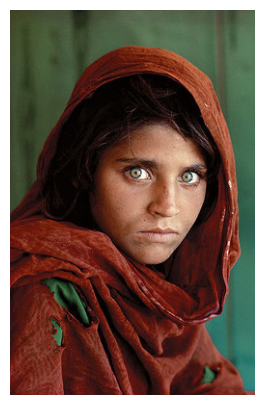

In [28]:
plt.figure()
plt.imshow(A)
plt.axis('off');

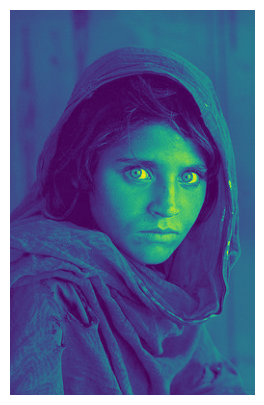

In [27]:
plt.figure()
plt.imshow(B)
plt.axis('off');

In [11]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

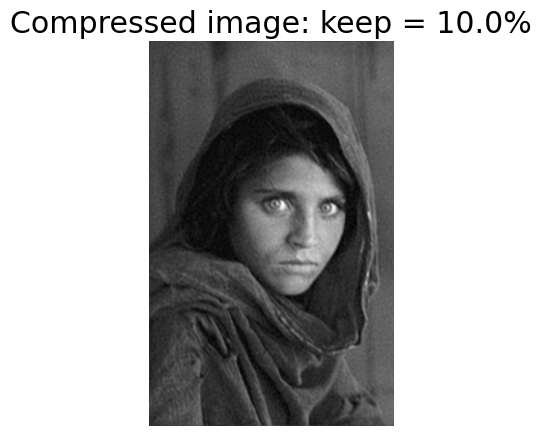

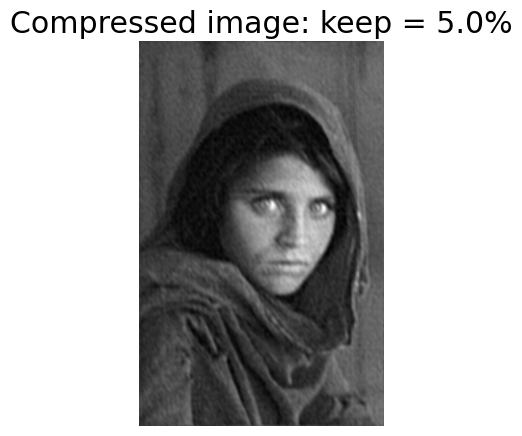

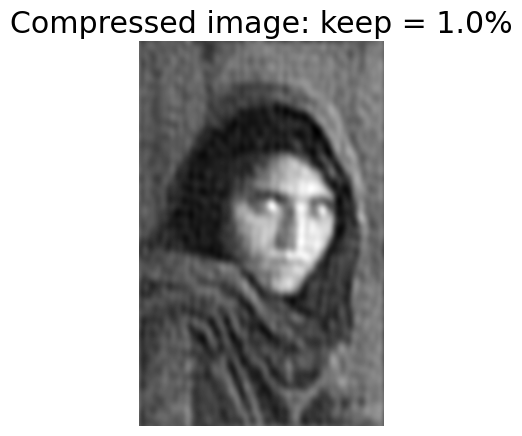

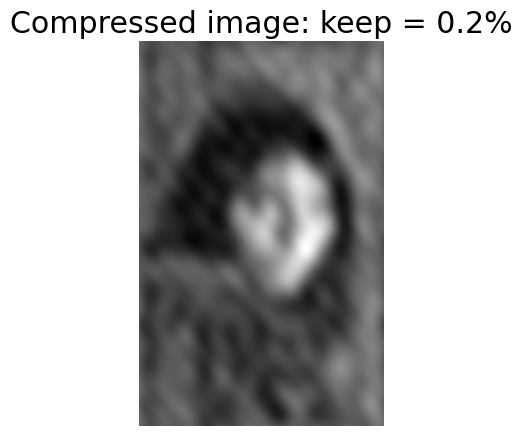

In [19]:
# Zero out all small coefficiens and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
  trhesh = Btsort[int(np.floor((1-keep) * len(Btsort)))]
  ind = np.abs(Bt) > trhesh
  Btlow = Bt * ind
  Alow = np.fft.ifft2(Btlow).real
  plt.figure()
  plt.imshow(Alow, cmap='gray')
  plt.axis('off')
  plt.title('Compressed image: keep = ' + str(keep*100) + '%')